In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv', on_bad_lines='skip')

In [3]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data.shape

(669640, 2)

In [5]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

password    0
strength    0
dtype: int64

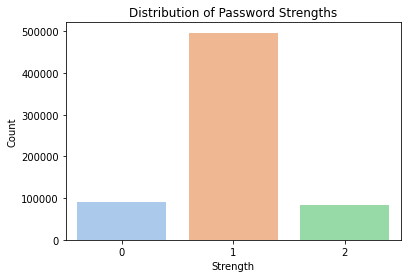

In [8]:
sns.countplot(x='strength', data=data,palette='pastel')
plt.xlabel('Strength')
plt.ylabel('Count')
plt.title('Distribution of Password Strengths')
plt.show()

# Convert to tuple Array

In [9]:
x = np.array(data['password'])
y = np.array(data['strength'])

## Defining a function to split input into list of individual characters

In [10]:
def word(password):
    character = []
    for i in password:
        character.append(i)
    return character

## Using TF-IDF vectorizer to convert String data into numerical data¶

In [11]:
tdif = TfidfVectorizer(tokenizer=word)
X = tdif.fit_transform(x)

## Split data into train (80%) & test (20%).

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
x_train.shape

(535711, 153)

In [14]:
x_test.shape

(133928, 153)

## Apply random forest classifier

In [15]:
model = RandomForestClassifier(n_estimators = 100,verbose=3,n_jobs=-1, max_depth=6)

In [16]:
model.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100
building tree 7 of 100
building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.8s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.9s finished


RandomForestClassifier(max_depth=6, n_jobs=-1, verbose=3)

In [17]:
model.score(x_train,y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished


0.7832189370761474

In [18]:
y_pred = model.predict(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17908
           1       0.78      1.00      0.87     99519
           2       0.99      0.34      0.51     16501

    accuracy                           0.78    133928
   macro avg       0.59      0.45      0.46    133928
weighted avg       0.70      0.78      0.71    133928



In [20]:
cm = confusion_matrix(y_test,y_pred)

In [21]:
print(cm)

[[    0 17907     1]
 [    0 99447    72]
 [    0 10895  5606]]


In [22]:
print(accuracy_score(y_test,y_pred))

0.7843990801027417


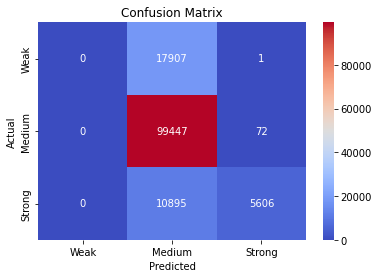

In [23]:
sns.heatmap(cm,annot=True, fmt = 'd',cmap='coolwarm',cbar=True,xticklabels=['Weak','Medium','Strong'],yticklabels=['Weak','Medium','Strong'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()